# 1. Carga de Librerías y Datos

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

## Cargar datos

In [4]:
df = pd.read_csv(r'C:\Users\sony\Documents\Regresión Logística\heart_cleveland_upload.csv')

# 2. Análisis Exploratorio de Datos (EDA)

In [6]:
print(df.head())
print(df.info())
print(df.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

## Visualización de la distribución de la variable objetivo

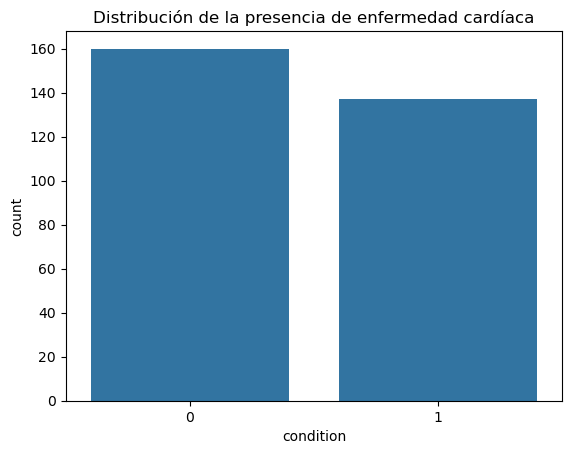

In [8]:
sns.countplot(x='condition', data=df)
plt.title("Distribución de la presencia de enfermedad cardíaca")
plt.show()

## Matriz de correlación

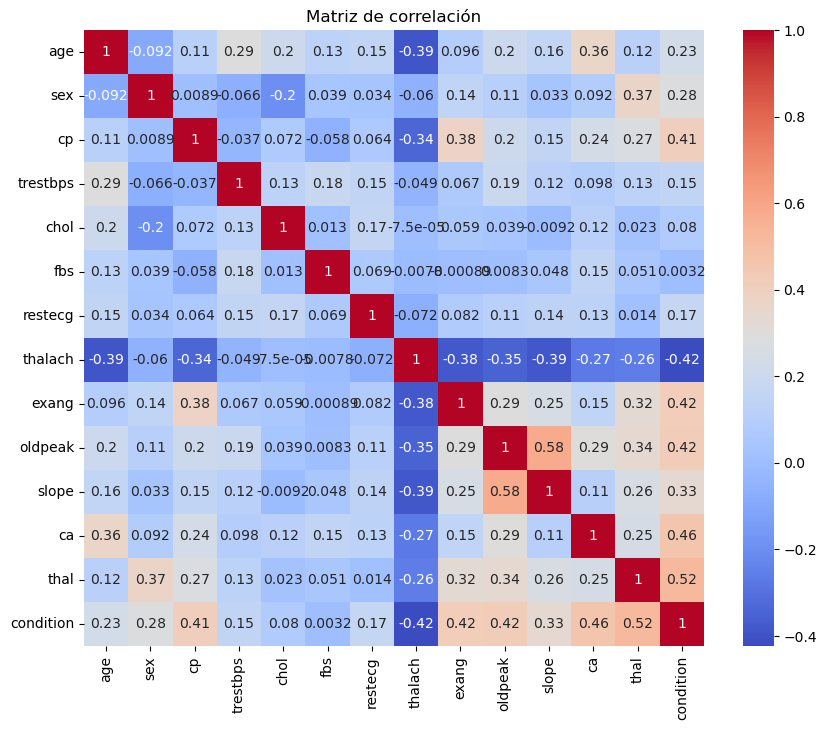

In [10]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

## Gráficos adicionales

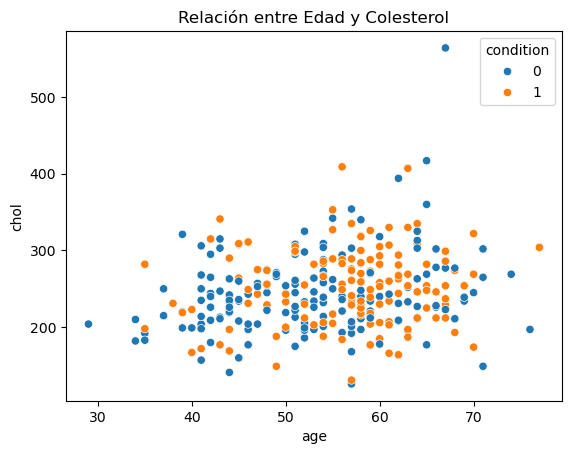

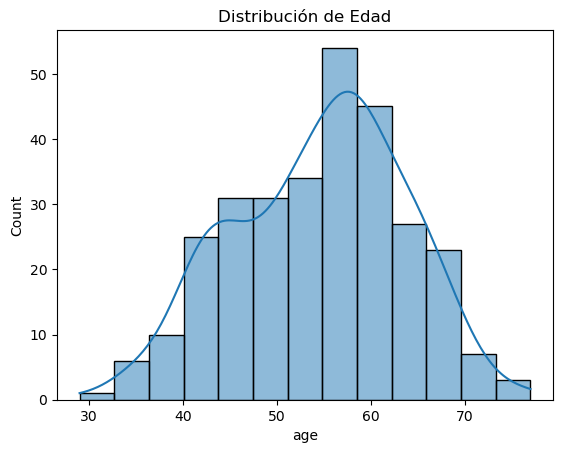

In [12]:
sns.scatterplot(x='age', y='chol', data=df, hue='condition')
plt.title("Relación entre Edad y Colesterol")
plt.show()

sns.histplot(df['age'], kde=True)
plt.title("Distribución de Edad")
plt.show()

## Gráficos de caja

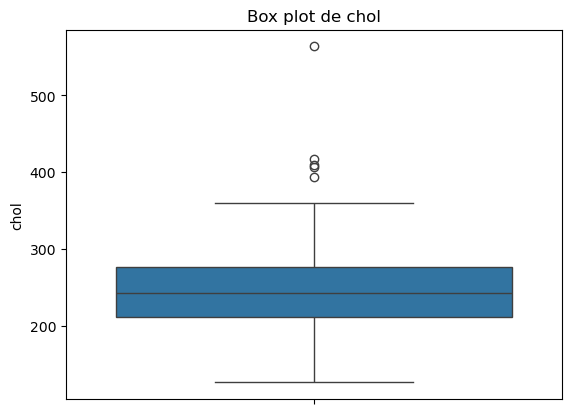

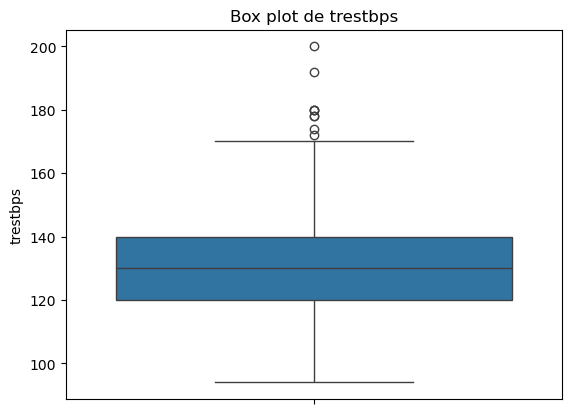

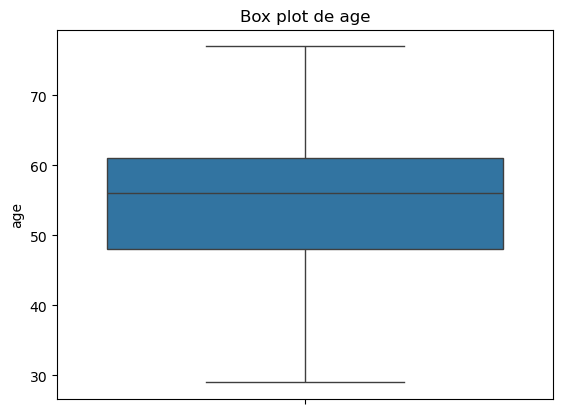

In [14]:
for col in ['chol', 'trestbps', 'age']:
    sns.boxplot(y=col, data=df)
    plt.title(f'Box plot de {col}')
    plt.show()

# 3. Preprocesamiento de Datos

In [16]:
print(df.isnull().sum())
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'thal'])

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


## Escalado de las variables numéricas

In [18]:
scaler = StandardScaler()
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# 4. Selección de Características

In [20]:
X = df_encoded.drop('condition', axis=1)
y = df_encoded['condition']

## Usar SelectKBest

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)
feature_scores = selector.scores_
features = X.columns
feature_scores_df = pd.DataFrame({'Feature': features, 'Score': feature_scores})
print(feature_scores_df.sort_values(by='Score', ascending=False))

      Feature       Score
20     thal_0  112.231025
13       cp_3  102.084176
22     thal_2   90.566585
7          ca   80.577866
6     oldpeak   64.677208
4     thalach   64.589855
5       exang   63.680253
17    slope_0   49.974913
18    slope_1   41.084540
12       cp_2   30.332572
8       sex_0   24.798347
9       sex_1   24.798347
11       cp_1   19.255618
0         age   16.038097
14  restecg_0    9.104470
16  restecg_2    7.498176
1    trestbps    7.117646
21     thal_1    3.266570
10       cp_0    2.474689
2        chol    1.913800
15  restecg_1    1.357174
19    slope_2    1.099975
3         fbs    0.002959


# 5. División de Datos en Entrenamiento y Prueba

In [24]:
X = df_encoded[['ca', 'sex_1', 'cp_3', 'slope_1', 'thal_2']]
y = df_encoded['condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 6. Entrenamiento del Modelo

In [26]:
model = LogisticRegression(solver='liblinear', C=1.0)
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

# 7. Evaluación del Modelo

In [28]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("Precisión (Accuracy):", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)
print(classification_report(y_test, y_pred))

Precisión (Accuracy): 0.8777777777777778
Recall: 0.8809523809523809
F1 Score: 0.8705882352941177
AUC-ROC: 0.9464285714285714
Matriz de Confusión:
 [[42  6]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        48
           1       0.86      0.88      0.87        42

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



# 8. Visualización de Resultados

## Curva ROC

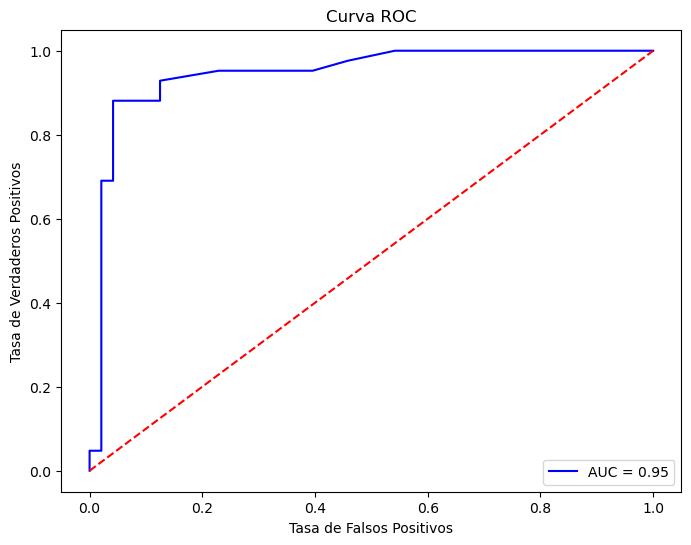

In [31]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## Matriz de confusión

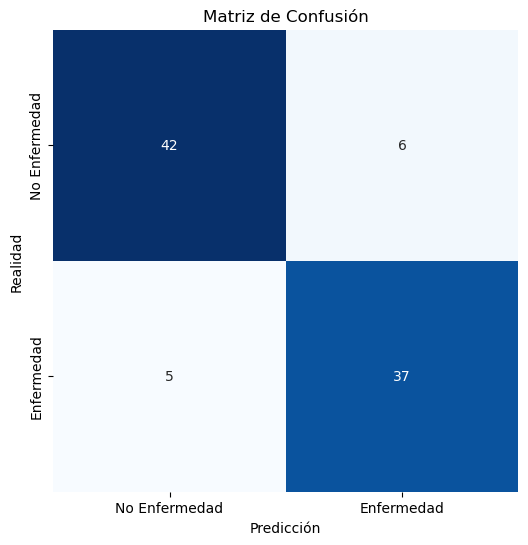

In [33]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Enfermedad', 'Enfermedad'], 
            yticklabels=['No Enfermedad', 'Enfermedad'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

## Distribuciones de probabilidad

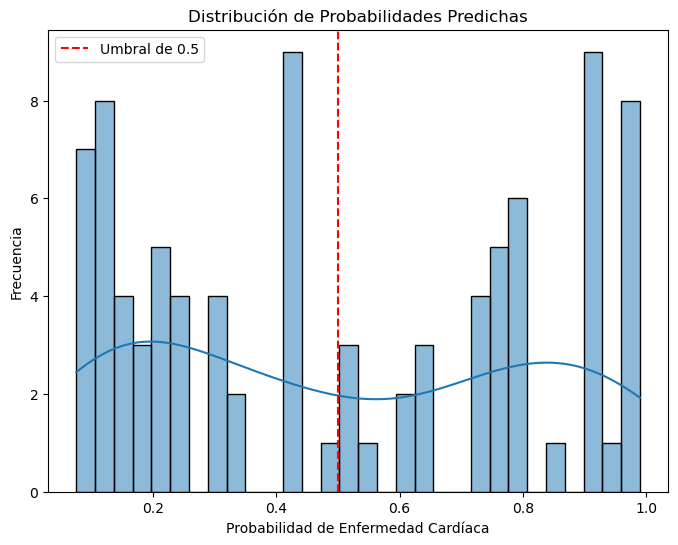

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(y_prob, bins=30, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Umbral de 0.5')
plt.title('Distribución de Probabilidades Predichas')
plt.xlabel('Probabilidad de Enfermedad Cardíaca')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 9. Interpretación y análisis de resultados

Desempeño del modelo:

Precisión (Accuracy): 87.78% indica que el modelo clasifica correctamente la mayoría de las instancias.
Recall: 88.1% muestra que el modelo es eficaz en detectar casos de enfermedad cardíaca, minimizando falsos negativos.
F1 Score: 87.06% refleja un buen equilibrio entre precisión y recall, lo que es crucial en contextos de salud.
AUC-ROC: 94.64% señala una excelente capacidad de discriminación entre clases.
Matriz de Confusión:Indica que se cometieron algunos errores en la clasificación (6 falsos positivos y 5 falsos negativos). 

Relevancia de Características: Las variables como ca, cp_3, y thal_2 fueron identificadas como las más influyentes, sugiriendo que estas características son críticas para predecir la enfermedad cardíaca.